In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# TODO: document removal of first and last article before counting click counts as well
# as removing few articles with link count errors
# (some articles like '%C3%85land' or 'Wikipedia_Text_of_the_GNU_Free_Documentation_License' do not have the correct num_links_in !)
articles = pd.read_csv("data/country_clicks_links.csv", index_col=0).reset_index()
articles = articles.rename(columns={'index': 'article'})

In [87]:
afghanistan = articles[articles.Top_1_name == 'afghanistan']
# TODO: fix afghanistan issue

In [88]:
articles['click_count_normalized'] = (articles['click_count'] / articles['num_links_in']).fillna(0)

In [89]:
countries_count = articles[['Top_1_name', 'article']].groupby('Top_1_name').agg('count').add_suffix('_count')
countries_clicks = articles[['Top_1_name', 'click_count', 'click_count_normalized']].groupby('Top_1_name').agg('sum')
countries = pd.concat([countries_count, countries_clicks], axis=1)
countries['click_count_normalized'] = countries['click_count_normalized'] / countries['article_count']
countries = countries.reset_index()

# 2. Are there cultural biases in the way players play Wikispeedia?


## 2.1 What articles are most often clicked on? How does this relate to the country of the article?

The first thing to do is to look at the *usage* of articles by players in the Wikispeedia game, so the number of times an article is clicked (e.g. number of article occurrences in the merged finished and unfinished paths).

In [90]:
df_country_clicks_links_sorted = articles.sort_values(by='click_count', ascending=False)

### Most used articles 

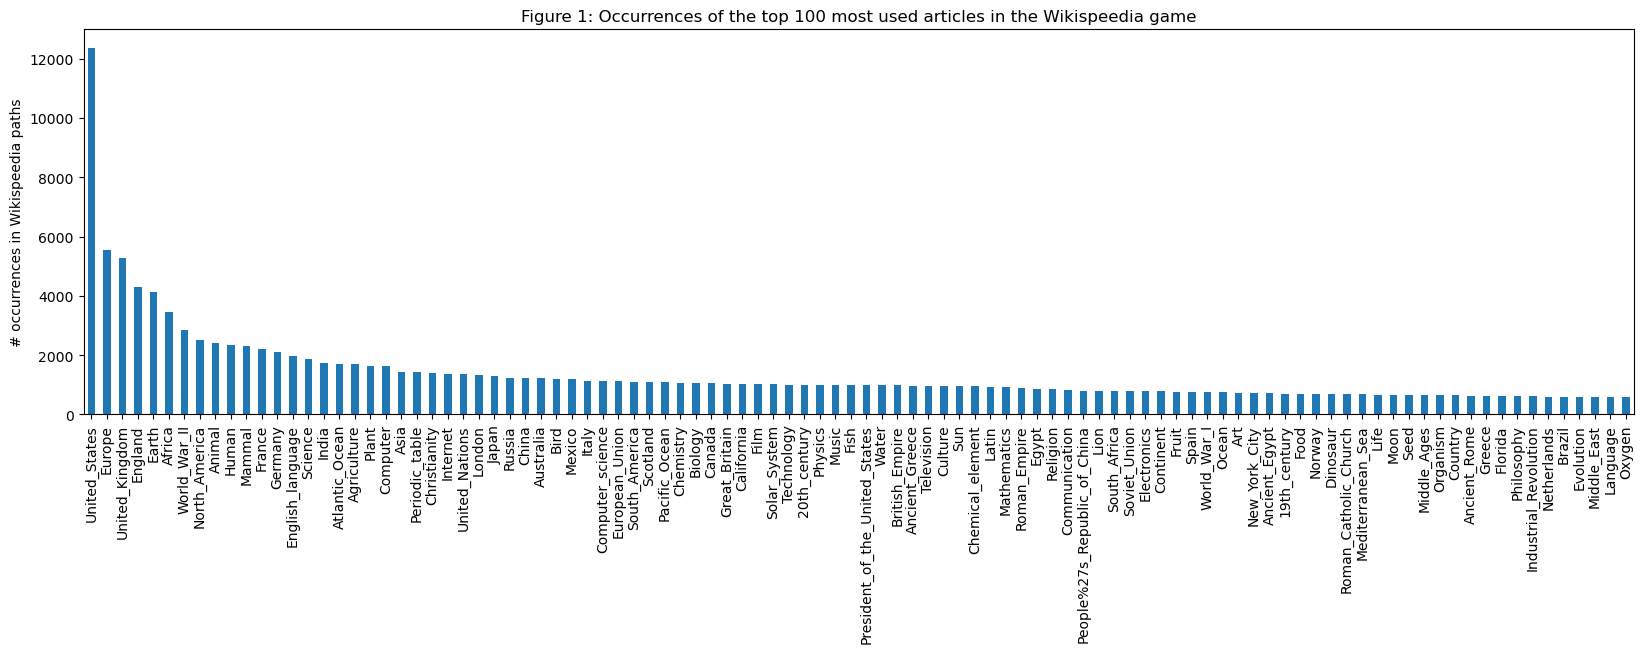

In [91]:
# plot the most used articles 
df_country_clicks_links_sorted['click_count'].head(100).plot(kind='bar', stacked=True, figsize=(20, 5))

plt.xticks(ticks=range(len(df_country_clicks_links_sorted.head(100))), labels=df_country_clicks_links_sorted['article'].tolist()[0:100], fontsize=10)
plt.ylabel('# occurrences in Wikispeedia paths')

plt.title("Figure 1: Occurrences of the top 100 most used articles in the Wikispeedia game")
plt.show()

**Which countries are represented within the most used articles?**

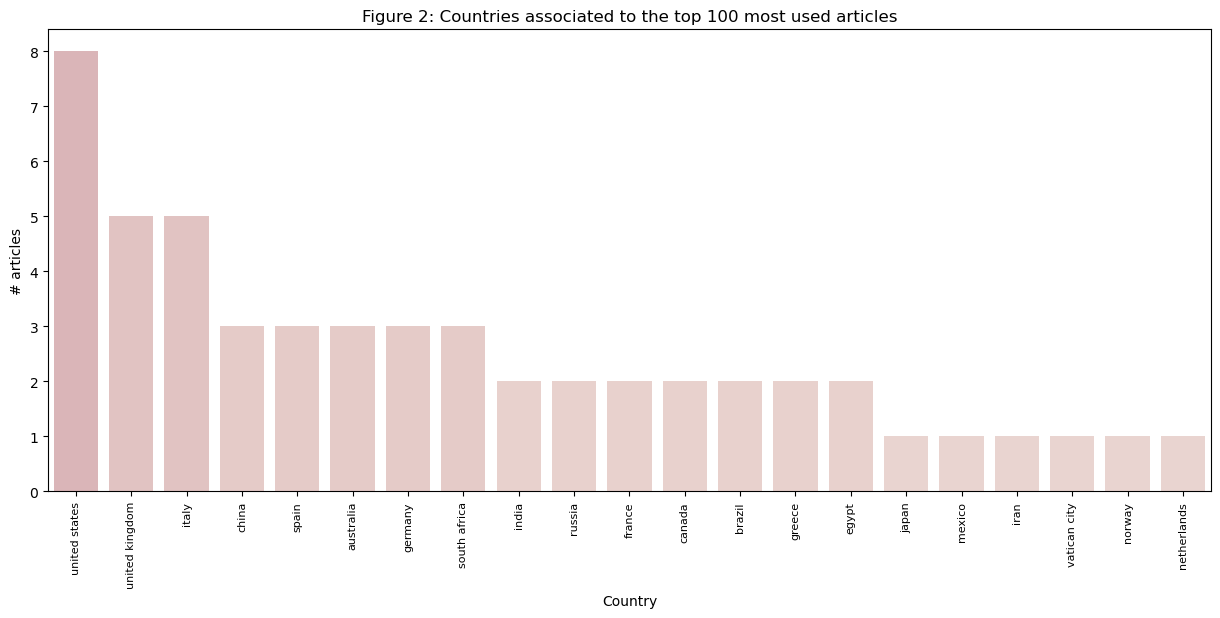

In [92]:
df_top_1_article_count_per_country = pd.DataFrame(df_country_clicks_links_sorted['Top_1_name'].head(100).value_counts(dropna=False))

plt.figure(figsize=(15, 6))
sns.barplot(x=df_top_1_article_count_per_country.index, y=df_top_1_article_count_per_country['count'], hue=df_top_1_article_count_per_country['count'], legend=False)
plt.xticks(fontsize=8, rotation=90)

plt.ylabel('# articles')
plt.xlabel("Country")
plt.title("Figure 2: Countries associated to the top 100 most used articles")

plt.show()

In [93]:
df_top_1_article_count_per_country[df_top_1_article_count_per_country.index.isna()]

,count
Top_1_name,
NaN,47


**Which countries are most clicked?**

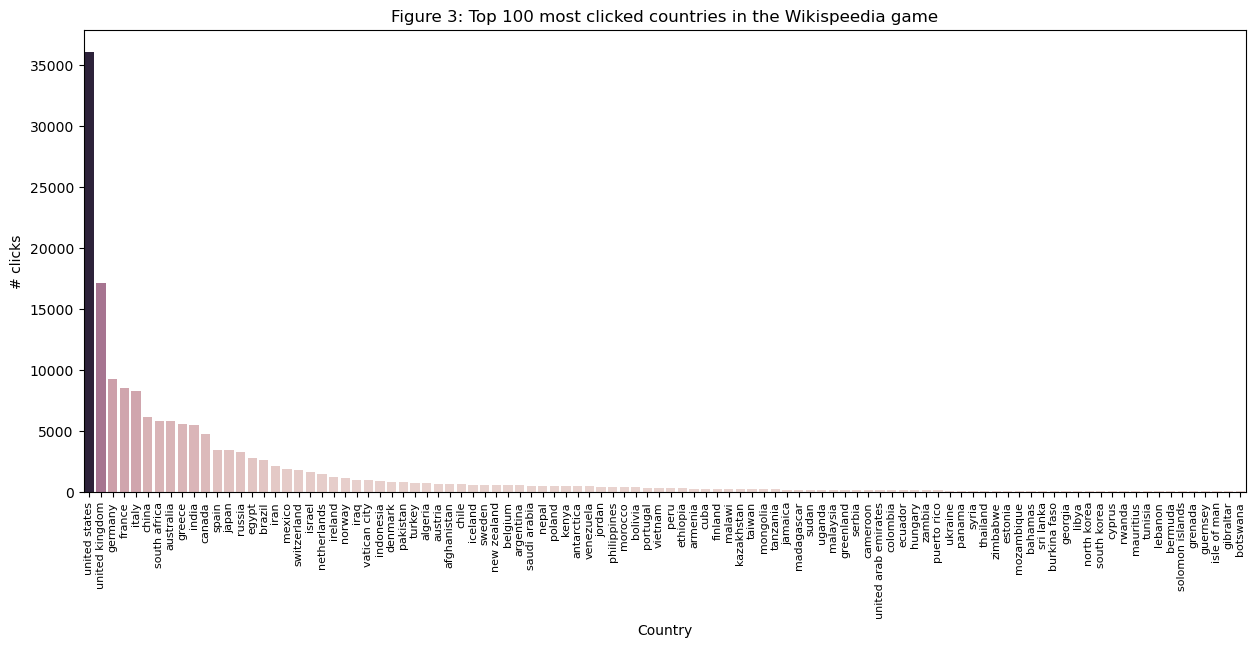

In [94]:
# count number of clicks per country
sorted_country_clicks = countries.sort_values(by='click_count', ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x="Top_1_name", y="click_count", hue='click_count', data=sorted_country_clicks.head(100), legend=False)

plt.xticks(ticks=range(len(sorted_country_clicks.head(100))), labels=sorted_country_clicks['Top_1_name'].head(100), fontsize=8, rotation=90)
plt.ylabel('# clicks')
plt.xlabel("Country")
plt.title("Figure 3: Top 100 most clicked countries in the Wikispeedia game")
plt.show()

### Least used articles

In [95]:
# find articles that are never clicked on
never_used_articles = articles[articles['click_count'] == 0]
print(f'there are {round(len(never_used_articles)/len(articles) * 100, 2)}% of articles that are never clicked on')

there are 22.13% of articles that are never clicked on


**Which countries are most represented within the least used articles?**

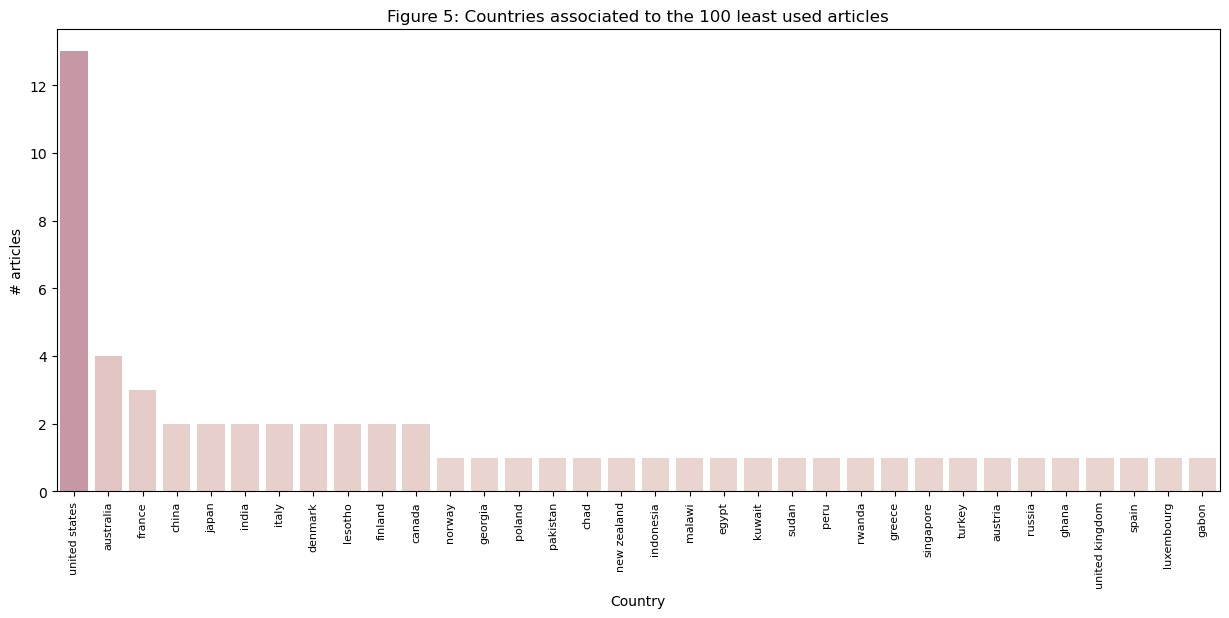

In [96]:
df_least_article_count_per_country = pd.DataFrame(df_country_clicks_links_sorted['Top_1_name'].tail(100).value_counts(dropna=False))

plt.figure(figsize=(15, 6))
sns.barplot(x=df_least_article_count_per_country.index, y=df_least_article_count_per_country['count'], hue=df_least_article_count_per_country['count'], legend=False)
plt.xticks(fontsize=8, rotation=90)

plt.ylabel('# articles')
plt.xlabel("Country")
plt.title("Figure 5: Countries associated to the 100 least used articles")

plt.show()

In [97]:
df_least_article_count_per_country[df_least_article_count_per_country.index.isna()]

,count
Top_1_name,
NaN,41


**What are the least clicked countries?**

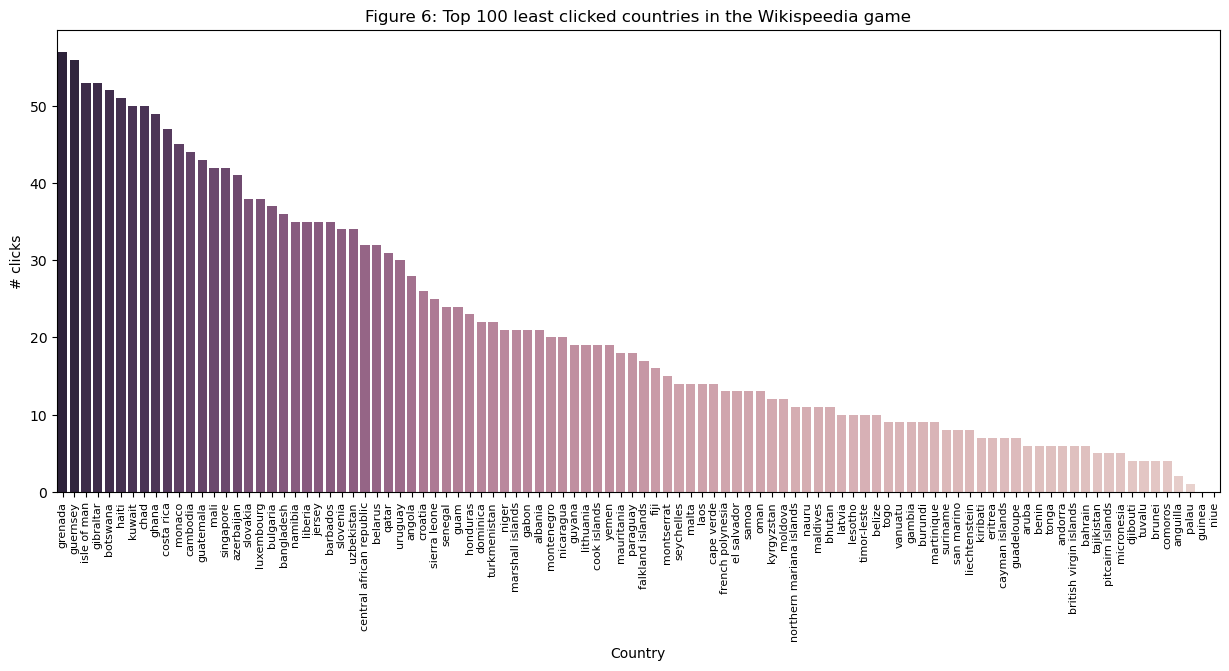

In [98]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Top_1_name", y="click_count", hue='click_count', data=sorted_country_clicks.tail(100), legend=False)

plt.xticks(ticks=range(len(sorted_country_clicks.tail(100))), labels=sorted_country_clicks['Top_1_name'].tail(100), fontsize=8, rotation=90)
plt.ylabel('# clicks')
plt.xlabel("Country")
plt.title("Figure 6: Top 100 least clicked countries in the Wikispeedia game")
plt.show()

### Caveat & scaling: a more advanced approach to investigate article usage

**Which countries are most clicked after scaling?**

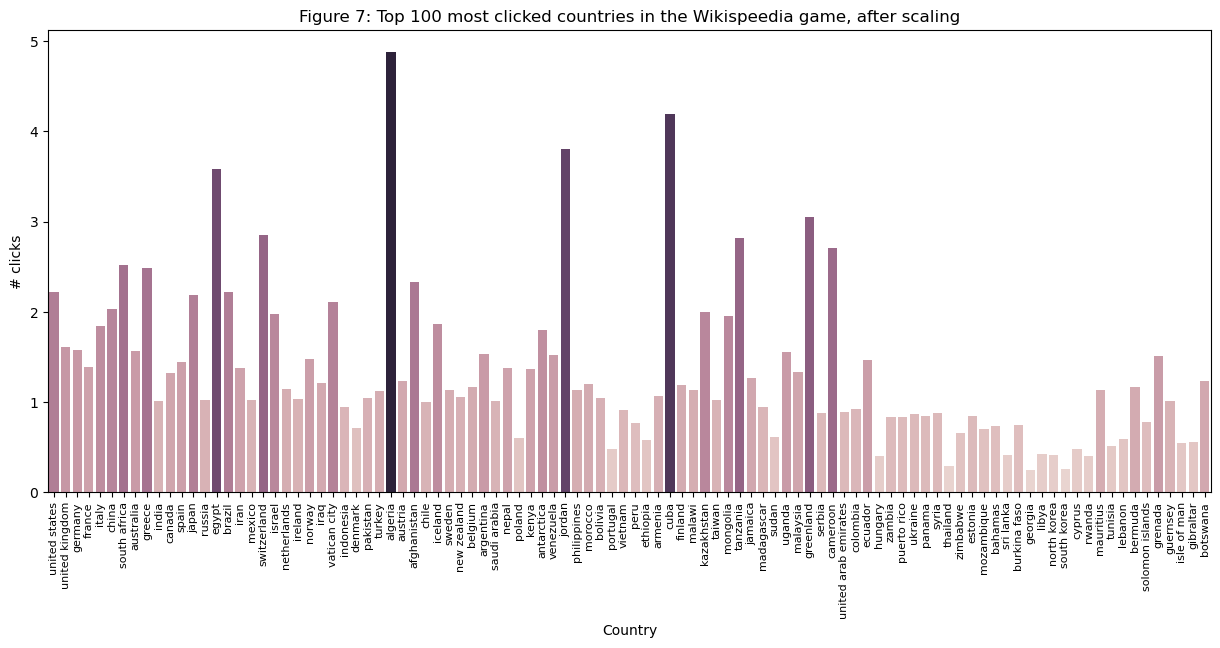

In [99]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Top_1_name", y="click_count_normalized", hue='click_count_normalized', data=sorted_country_clicks.head(100), legend=False)

plt.xticks(ticks=range(len(sorted_country_clicks.head(100))), labels=sorted_country_clicks['Top_1_name'].head(100), fontsize=8, rotation=90)
plt.ylabel('# clicks')
plt.xlabel("Country")
plt.title("Figure 7: Top 100 most clicked countries in the Wikispeedia game, after scaling")
plt.show()

**Which countries are least clicked after scaling?**

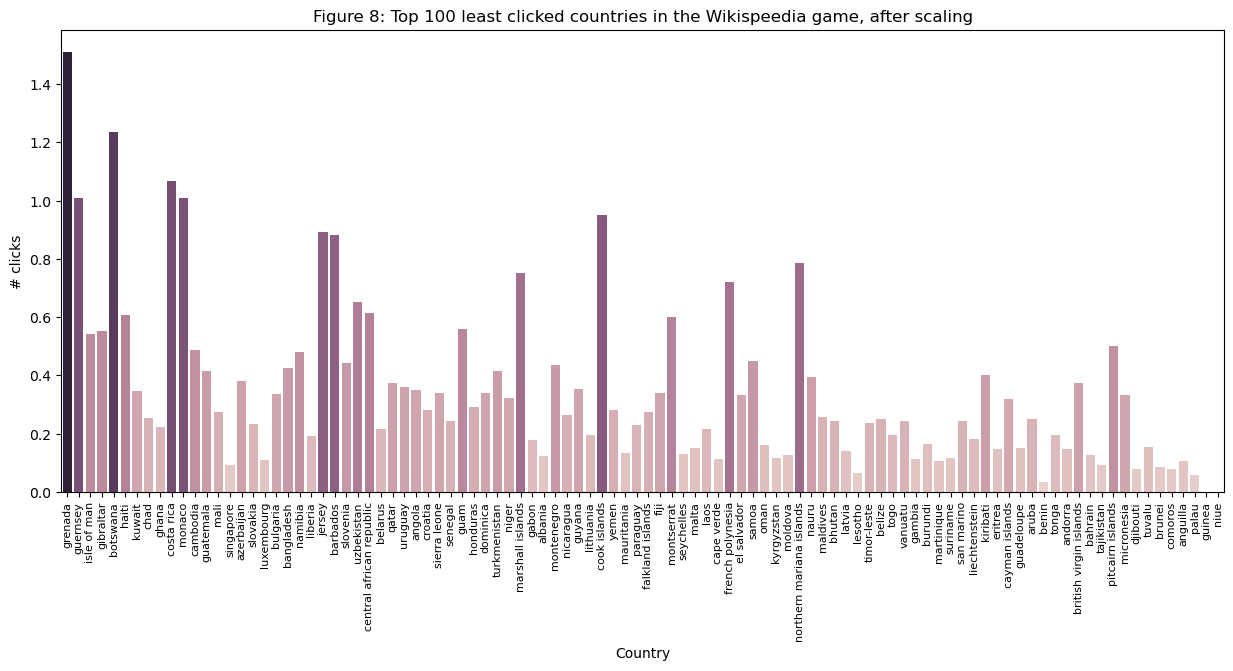

In [100]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Top_1_name", y="click_count_normalized", hue='click_count_normalized', data=sorted_country_clicks.tail(100), legend=False)

plt.xticks(ticks=range(len(sorted_country_clicks.tail(100))), labels=sorted_country_clicks['Top_1_name'].tail(100), fontsize=8, rotation=90)
plt.ylabel('# clicks')
plt.xlabel("Country")
plt.title("Figure 8: Top 100 least clicked countries in the Wikispeedia game, after scaling")
plt.show()